In [4]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

import pickle

from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', None)

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gX-IrfdlSjKI0eQUg-YEqLAHFT6GJZ6_2g48KtT80Ccd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'promotionpredictionbyajay-donotdelete-pr-ap1f2h9uji8mn0'
object_key = 'emp_promotion.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
print('Shape of train data {}'.format(df.shape))

Shape of train data (54808, 14)


In [2]:

df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [5]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [6]:
df=df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

In [7]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Replacing nan with mode

print(df['education'].value_counts()) 
df['education'] = df['education'].fillna(df['education'].mode()[0])




Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [9]:

print(df['previous_year_rating'].value_counts())

df['previous_year_rating'] = df["previous_year_rating"].fillna(df['previous_year_rating'].mode()[0])



3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


In [10]:
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]

negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [12]:
q1=np.quantile(df['length_of_service'],0.25) 
q3=np.quantile(df['length_of_service'],0.75)

IQR=q3-q1

upperBound=(1.5*IQR)+q3

lowerBound=(1.5*IQR)-q1

print('q1:',q1)

print('q3:',q3) 
print('IQR:',IQR)

print('Upper Bound :', upperBound)

print('Lower Bound :',lowerBound)

print('Skewed data :',len(df[df['length_of_service']>upperBound]))

q1: 3.0
q3: 7.0
IQR: 4.0
Upper Bound : 13.0
Lower Bound : 3.0
Skewed data : 3489


In [13]:
#Feature mapping is done on education column

df['education']=df['education'].replace(("Below Secondary", "Bachelor's", "Master's & above"),(1,2,3))

lb=LabelEncoder()

df['department']=lb.fit_transform(df['department'])

In [14]:


# Splitting data and resampling it

x = df.drop('is_promoted', axis=1) 
y=df['is_promoted'] 
print(x.shape) 
print(y.shape)


(54808, 9)
(54808,)


In [15]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 23.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

sm =SMOTE()

x_resample, y_resample = sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

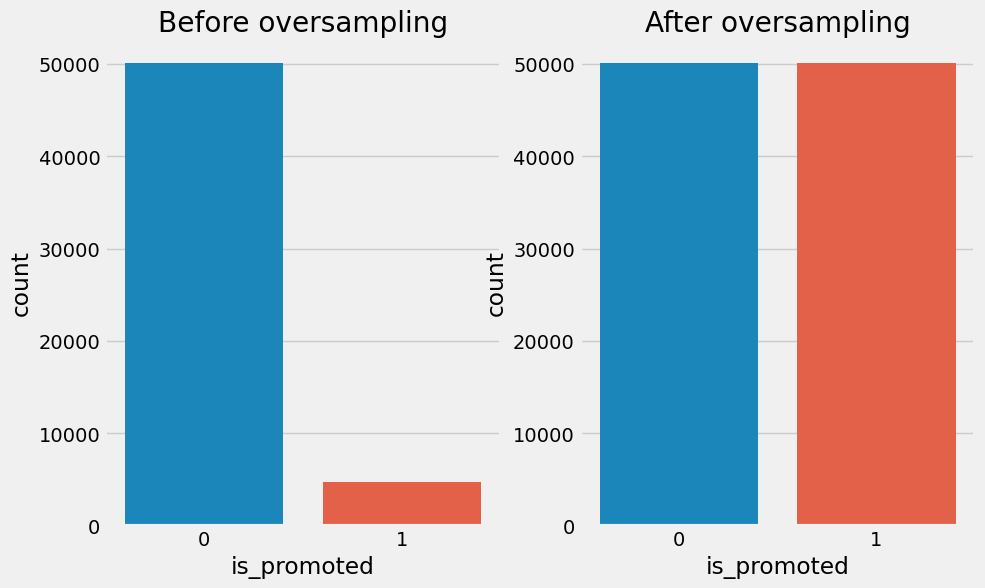

In [17]:
plt.figure(figsize=(10,6))

plt.subplot(121) 
sns.countplot(y)

plt.title('Before oversampling')

plt.subplot(122)

sns.countplot(y_resample) 
plt.title('After oversampling')

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)
print('Shape of x_train {}'.format(x_train.shape))

print('Shape of y_train {}'.format(y_train.shape)) 
print('Shape of x_test {}'.format(x_test.shape))

print('Shape of y_test {}'.format(y_test.shape))



Shape of x_train (70196, 9)
Shape of y_train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


In [19]:
def randomForest(x_train,x_test,y_train,y_test):
 rf=RandomForestClassifier()
 rf.fit(x_train,y_train)
 yPred=rf.predict(x_test)
 print("RandomForestClassifier")
 print('Confusion matrix') 
 print(confusion_matrix(y_test,yPred))
 print('Classification report') 
 print(classification_report(y_test,yPred))


In [20]:

rf=RandomForestClassifier() 
rf.fit(x_train,y_train) 
yPred=rf.predict(x_test)

cv= cross_val_score(rf,x_resample,y_resample,cv=5)

np.mean(cv)



0.9383625847626644

In [19]:

pickle.dump(rf, open('promotion_model.pkl', 'wb'))


In [23]:
x_train.head(3)

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
73854,7,3,1,38,1.454043,10,1,0,52
36834,0,2,1,27,3.000000,4,0,0,87
34864,7,3,2,35,1.000000,4,0,0,47


In [31]:
new=rf.predict([[0,1,2.0,1,10,1,10,1,87]])
new
import pickle
pickle.dump(rf,open('promotion.pkl','wb'))
!tar -zcvf promotion_prediction.tgz promotion.pkl
from ibm_watson_machine_learning import APIClient
wml_credentials={ 
                  "url":"https://us-south.ml.cloud.ibm.com",
                  "apikey":"tO3Odab6caxUAezVXS6CZ1_KELSygxz47Ea-2TyCcnPD"
    
                }
client=APIClient(wml_credentials)


promotion.pkl


In [37]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])
space_uid = guid_from_space_name(client, space_name='ajay')
print("Space UID = " + space_uid)
client.set.default_space(space_uid)
client.software_specifications.list()

Space UID = 1e0f1a65-3fee-4ee5-aeba-86cd80faa79b
-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828

In [38]:
import sklearn
sklearn.__version__

software_spec_uid= client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [39]:
model_details = client.repository.store_model(model='promotion_prediction.tgz',
                                              meta_props={client.repository.ModelMetaNames.NAME:"promotion_prediction",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },
                                              training_data=x_train,
                                              training_target=y_train)

In [40]:

model_id = client.repository.get_model_id(model_details)
model_id

import pickle
pickle.dump(rf,open('promotion.pkl','wb'))